In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [3]:
data_dir = tf.keras.utils.get_file('flower_photos',origin= dataset_url,cache_dir = '.',untar = True)

In [4]:
data_dir

'.\\datasets\\flower_photos'

In [5]:
import pathlib

In [6]:
data_dir = pathlib.Path(data_dir)

In [7]:
data_dir

WindowsPath('datasets/flower_photos')

In [8]:
image_count = list(data_dir.glob('*/*.jpg'))

In [9]:
len(image_count)

3670

In [10]:
roses = list(data_dir.glob('roses/*'))
len(roses)

641

In [11]:
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

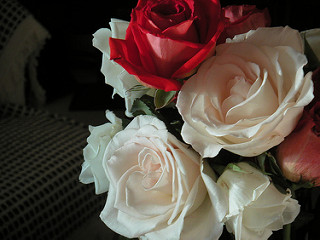

In [12]:
PIL.Image.open(str(roses[1]))

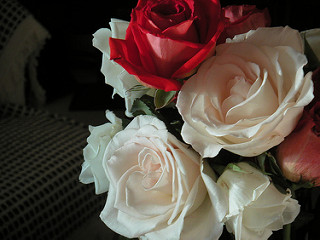

In [13]:
PIL.Image.open(roses[1])

In [14]:
tulips = list(data_dir.glob('tulips/*'))

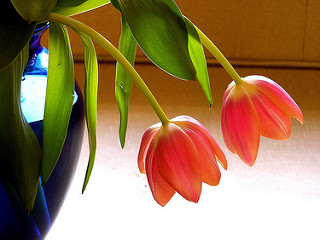

In [15]:
PIL.Image.open(tulips[23])

In [16]:
flowers_labels_dict ={
    'roses' :0,
    'daisy' :1,
    'dandelion':2,
    'sunflowers':3,
    'tulips'  :4
}

In [17]:
flowers_images_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*')),
}

In [18]:
img = cv2.imread(str(flowers_images_dict['roses'][5]))

In [19]:
img.shape


(276, 320, 3)

In [20]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [21]:
X,y = [], []
for flowers_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_image = cv2.resize(img,(180,180))
        X.append(resized_image)
        y.append(flowers_labels_dict[flowers_name])
        
        

In [22]:
X = np.array(X)
y = np.array(y)

In [23]:
y[:5]

array([0, 0, 0, 0, 0])

In [24]:
X[0]/255


array([[[0.00392157, 0.0627451 , 0.02745098],
        [0.00392157, 0.0627451 , 0.02745098],
        [0.00392157, 0.06666667, 0.03529412],
        ...,
        [0.09019608, 0.19607843, 0.12156863],
        [0.09803922, 0.2       , 0.1254902 ],
        [0.10196078, 0.20392157, 0.12941176]],

       [[0.03921569, 0.09019608, 0.05882353],
        [0.03921569, 0.09019608, 0.05882353],
        [0.03529412, 0.08627451, 0.05490196],
        ...,
        [0.07843137, 0.17254902, 0.11764706],
        [0.09019608, 0.18431373, 0.12941176],
        [0.10196078, 0.19607843, 0.14117647]],

       [[0.05098039, 0.07843137, 0.05098039],
        [0.04705882, 0.07843137, 0.05098039],
        [0.04313725, 0.0745098 , 0.04705882],
        ...,
        [0.08235294, 0.16862745, 0.11764706],
        [0.08627451, 0.17647059, 0.12156863],
        [0.09803922, 0.18823529, 0.13333333]],

       ...,

       [[0.04705882, 0.09411765, 0.07058824],
        [0.04313725, 0.08627451, 0.05882353],
        [0.04705882, 0

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [27]:
X_train = X_train/255

In [28]:
X_test = X_test/255

In [29]:
len(X_train)

2936

In [30]:
len(X_test)

734

In [31]:
cnn  = keras.Sequential([
    keras.layers.Conv2D(16,3,padding = 'same',activation = 'relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3,padding = 'same',activation = 'relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64,3,padding = 'same',activation = 'relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(5,activation = 'sigmoid')
    
])

In [32]:
cnn.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [33]:
y_train

array([2, 3, 1, ..., 1, 4, 4])

In [34]:
cnn.fit(X_train,y_train,epochs = 30)

Epoch 1/30
92/92 [==============================] - 47s 492ms/step - loss: 1.4182 - accuracy: 0.3787
Epoch 2/30
92/92 [==============================] - 44s 483ms/step - loss: 1.0419 - accuracy: 0.5916
Epoch 3/30
92/92 [==============================] - 44s 474ms/step - loss: 0.8051 - accuracy: 0.6904
Epoch 4/30
92/92 [==============================] - 46s 499ms/step - loss: 0.5621 - accuracy: 0.7956
Epoch 5/30
92/92 [==============================] - 44s 483ms/step - loss: 0.3536 - accuracy: 0.8815
Epoch 6/30
92/92 [==============================] - 45s 485ms/step - loss: 0.2104 - accuracy: 0.9360
Epoch 7/30
92/92 [==============================] - 46s 499ms/step - loss: 0.1331 - accuracy: 0.9605
Epoch 8/30
92/92 [==============================] - 46s 496ms/step - loss: 0.0818 - accuracy: 0.9785
Epoch 9/30
92/92 [==============================] - 46s 499ms/step - loss: 0.0440 - accuracy: 0.9911
Epoch 10/30
92/92 [==============================] - 47s 508ms/step - loss: 0.0434 - accura

In [35]:
cnn.evaluate(X_test,y_test)

23/23 [==============================] - 6s 244ms/step - loss: 3.3227 - accuracy: 0.6322


[3.3226518630981445, 0.6321526169776917]

In [67]:
data_augmenation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip('horizontal',input_shape =(180,180,3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1)
])

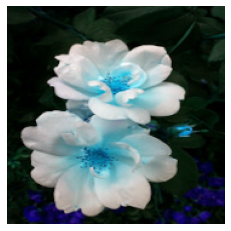

In [63]:
plt.axis('off')
plt.imshow(X[0])

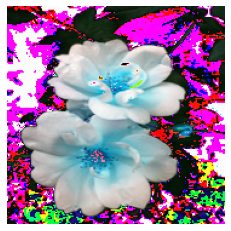

In [66]:
plt.axis('off')
plt.imshow(data_augmenation(X)[0].numpy().astype('uint8'))

In [68]:
cnn  = keras.Sequential([
    data_augmenation,
    
    keras.layers.Conv2D(16,3,padding = 'same',activation = 'relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3,padding = 'same',activation = 'relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64,3,padding = 'same',activation = 'relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(5,activation = 'sigmoid')
    
])

In [69]:
cnn.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [70]:
cnn.fit(X_train,y_train,epochs=30)

Epoch 1/30
92/92 [==============================] - 95s 1s/step - loss: 1.3352 - accuracy: 0.4305
Epoch 2/30
41/92 [============>.................] - ETA: 46s - loss: 1.0304 - accuracy: 0.5930

KeyboardInterrupt: 